# __The Rise of Telemedicine in the Pandemic and its Impact on American Healthcare Access and Use__

#### By: Melina Yang (yang.meli@northeastern.edu), Bela Burtch(burtch.i@northeastern.edu), Elaine Ng (ng.el@northeastern.edu)
#### DS2001 

__Abstract:__ We plan to determine whether or not telemedicine usage has actually increased along with the apparent increase in access by providers. Telemedicine is still a fairly new addition to the healthcare industry, as it has become more popular during the pandemic. By looking at statistics on how it has been put to the test in a situation such as a global pandemic, it proves that there is potential for telemedicine to be a healthcare industry norm. We envision our project to be a way to see where improvements need to be made in order to increase accessibility and overall usage of telemedicine. We are focusing on the 2019 to 2021 data. We focused on the demographics of people using telemedicine, looking at geography, people with chronic illnesses, and people who are on Medicare. We also looked at telemedicine appointments made and the provision of telemedicine in health centers or by physicians. Contrary to our initial expectations, both telemedicine usage and access overall declined between 2019-2021. However, the usage of telemedicine proliferated during the pandemic for those on Medicare and Medicaid. 

In [12]:
import matplotlib.pyplot as plt
import numpy as np


RANDS_FILE = "Access_and_Use_of_Telemedicine_During_COVID-19.csv"
MEDICARE_FILE = "Medicare_Telemedicine_Snapshot.csv"

In [13]:
def read_data(filename):
    """
    We used this code from data_utils from class.
    Read dataset into a list of lists. 

  Parameters
    ----------
    filename : string
        name of the file
    skip_header: boolean, optional
        whether or not to skip a header row. Default to False.
    type_casts: list, optional
        type specification for each column in the data
    Returns
    -------
    data : list of lists
        list of lists of values for all lines in the file

    """
    file = open(filename, "r") 
    data = []
    for line in file:
        # split the review on whitespace
        data.append(line.strip().split(","))
    # close the file in the same function that we opened it in
    file.close() 
    return data

In [14]:
def read_data_dict(filename, type_cast_dict = {}):
    """
    We used code from data_utils given in class.
    Reads in the data in a given file and stores the values in a list of dicts 
    of strings (by default). Assumes that commas separate row items in the 
    given file. 

    Parameters
    ----------
    filename : string
        name of the file

    type_casts: dict, optional
        type specification for each column in the data
    Returns
    -------
    data : list of dicts
        list of dicts of values for all lines in the file
        
    """
    file = open(filename, "r")
    data = []
   
    headers = file.readline()
    
    headers = headers.strip().split(",")
     
    for line in file:
        pieces = line.strip().split(",")
        
        row_dict = {}
        
        
        # go through each column and link the value
        # to the appropriate header
        for i in range(len(pieces)):
        
            # {"rotten_tomato": int, "IMDB": float}
            if headers[i] in type_cast_dict:
                cast_func = type_cast_dict[headers[i]]
                row_dict[headers[i]] = cast_func(pieces[i])
                
            else:
                row_dict[headers[i]] = pieces[i]
                
        data.append(row_dict)
        
    file.close()
    return data

In [15]:
# GRAPH 1

# the total surveyed offered telemedicine function is for debugging 
def total_surveyed_offered_telemedicine(rands):
    """
    This function returns a list of the number of people that were surveyed. 
    Used for debugging purposes. 

    Parameters
    ----------
    rands : list of dictionaries
    
    Returns
    -------
    totals_ls : list

    """
    # NOT INCLUDED IN THE GRAPH
    total_ls = []
    for rands_dict in rands:
       # runs multiple filters to get the list of total sampled
       if rands_dict['Indicator'] == "Provider offers telemedicine" and rands_dict['Group'] == "Total" and rands_dict["Response"] == "Total":
            total_ls.append(rands_dict['Sample Size'])  
    # convert type
    totals_ls = [int(i) for i in total_ls]
        
    return totals_ls

In [16]:
def yes_offered_telemedicine(rands):
    """
    This function returns a filtered list of the number of people that responded
    "Yes" to the question "Have you been offered a telemedicine appointment?"

    Parameters
    ----------
    rands : list of dict

    Returns
    -------
    new_ls : list

    """
       
    total_ls = []
    yes_ls = []
    
    for rands_dict in rands: 
        
        # runs multiple filters to get the list the total surveyed
        if rands_dict['Indicator'] == "Provider offers telemedicine" and rands_dict['Group'] == "Total" and rands_dict["Response"] == "Total":
            total_ls.append(rands_dict['Sample Size'])  
            
        # runs multiple filters to get the list of percentages that said yes
        if rands_dict['Indicator'] == "Provider offers telemedicine" and rands_dict['Group'] == "Total" and rands_dict["Response"] == "Yes":
            yes_ls.append(rands_dict["Percent"])
          
    percent_ls = [float(i) for i in yes_ls]
    totals_ls = [int(i) for i in total_ls]
    # use the percent_ls to convert into decimal
    decimals = [i * 0.01 for i in percent_ls]
    
    
    new_ls = []
    # use the decimal for a conversion of percent of people to number of people
    for x in range(0, len(totals_ls)):
        new_ls.append(totals_ls[x] * decimals[x])
        
    return new_ls

In [17]:
# for debugging
def people_scheduled_question(rands):
    """
    This function returns a list of the number of people that were surveyed.
    Used for ddebugging purposes. 

    Parameters
    ----------
    rands : list of dict

    Returns
    -------
    totals_ls : list

    """
    # NOT INCLUDED IN THE GRAPH

    total_ls = []
    # runs multiple filters to get the list of total sampled
    for rands_dict in rands: 
        if rands_dict['Indicator'] == "Scheduled one or more telemedicine appointments"  and rands_dict['Group'] == "Total" and rands_dict["Response"] == "Total":
            total_ls.append(rands_dict['Sample Size']) 
    # convert type

    totals_ls = [int(i) for i in total_ls]
       
    return totals_ls

In [18]:
def people_scheduled_question_yes(rands):
    """
    This function returns a filtered list of the number of people that were surveyed about 
    if they were offered telemedicine. This filter is the people who said yes. 

    Parameters
    ----------
    rands : list of dict

    Returns
    -------
    totals_ls : list

    """
   
    total_ls = []
    yes_ls = []
    
    for rands_dict in rands: 
        
        # to runs multiple filters to get the list of total sampled 
        if rands_dict['Indicator'] == "Scheduled one or more telemedicine appointments" and rands_dict['Group'] == "Total" and rands_dict["Response"] == "Total":
            total_ls.append(rands_dict['Sample Size'])  
            
        # runs multiple filters to get the list of percentages that said yes
        if rands_dict['Indicator'] == "Scheduled one or more telemedicine appointments" and rands_dict['Group'] == "Total" and rands_dict["Response"] == "Yes":
            
            yes_ls.append(rands_dict["Percent"])
    # similar conversions as above
    percent_ls = [float(i) for i in yes_ls]
    totals_ls = [int(i) for i in total_ls]

    decimals = [i * 0.01 for i in percent_ls]
    
    
    new_ls = []
    for x in range(0, len(totals_ls)):
        new_ls.append(totals_ls[x] * decimals[x])
        
    return new_ls

In [19]:
    
def graph1(rands):
    """
    This function graphs the American Access and Use of Telemedicine during COVID-19. 

    Parameters
    ----------
    rands : list of dictionaries

    Returns
    -------
    bar graph

    """
    
    width = 0.4
    
    # the time periods 
    # Round one was Jun/Jul2020
    # Round two was Aug 2020
    # Round three was May/Jun 2021
    x = ["1 (Jun/Jul 2020)", "2 (Aug 2020)", "3 (May/Jun 2021)"]
    
    # the two bars per roundd
    offered = yes_offered_telemedicine(rands)
    used = people_scheduled_question_yes(rands)
    
    bar1 = np.arange(len(x))
    bar2 = [i+width for i in bar1]
    
    # labels and formatting of the graph
    plt.bar(bar1, offered, width, label = "Offered Telemedicine", color = "purple")
    plt.bar(bar2,used, width, label ="Used Telemedicine")
    plt.legend()
    plt.xlabel("Rounds")
    plt.ylabel("Number of People")
    plt.title("American Access and Use of Telemedicine During the Covid-19 Pandemic")
    plt.xticks(bar1, x)
     
    plt.show()

In [20]:
#GRAPH 2
def percent_urban(rands):
    """
    This function returns a list of the percent of people that used telemedicine
    dudring the pandemic in urban (metropolitan) areas. 

    Parameters
    ----------
    rands : list of dict

    Returns
    -------
    percent_ls : list

    """
    percent_ls = []
    for rands_dict in rands:
        # to run multiple filters to get the percentages of people who have scheduled
        # telemedicine appointments in urban areas
        if rands_dict['Indicator'] == "Scheduled one or more telemedicine appointments" and rands_dict['Subgroup'] == "Metropolitan" and rands_dict["Response"] == "Yes":
            percent_ls.append(rands_dict['Percent'])  
    # convert type
    percent_ls = [float(i) for i in percent_ls]         
    return percent_ls

In [21]:
def percent_rural(rands):
    """
    This function returns a list of the percent of people that used telemedicine
    dudring the pandemic in rural (non-metropolitan) areas. 

    Parameters
    ----------
    rands : list of dict

    Returns
    -------
    percent_ls : list

    """
    percent_ls = []
    for rands_dict in rands:
        # to run multiple filters to get the percentages of people who have scheduled
        # telemedicine appointments in non-metropolitan areas
        if rands_dict['Indicator'] == "Scheduled one or more telemedicine appointments" and rands_dict['Subgroup'] == "Non-Metropolitan" and rands_dict["Response"] == "Yes":
            percent_ls.append(rands_dict['Percent'])  
    percent_ls = [float(i) for i in percent_ls]   
    return percent_ls 

In [22]:
def graph2(rands):
    """
    This function creates a graph of Urban and Rural usage of telemedicine during the pandemic.

    Parameters
    ----------
    rands : list of dicts
        Our Rands dataset read into a list of dicts

    Returns
    -------
    None.

    """
    
    width = 0.4
    # to label the roundsd
    x = ["1 (Jun/Jul2020)", "2 (Aug 2020)", "3 (May/Jun 2021)"]
    # the two bars per round
    y1 = percent_urban(rands)
    y2 = percent_rural(rands)
    
    bar1 = np.arange(len(x))
    bar2 = [i+width for i in bar1]
    # labels and formatting
    plt.bar(bar1, y1, width, label = "Metropolitan", color = "green")
    plt.bar(bar2,y2, width, label ="Non-metropolitan")
    plt.xlabel("Rounds")
    plt.ylabel("Percentage of People")
    plt.legend()
    plt.title("Urban and Rural Usage of Telemedicine During the Pandemic")
    plt.xticks(bar1, x)
       
    plt.show()

In [23]:
#GRAPH 3
def medicare_pandemic(medicare):
    """
    This function returns the value of how many people under medicare used telemedicine during the pandemic.

    Parameters
    ----------
    medicare : list of dicts
        Our medicare dataset read into a list of dicts

    Returns
    -------
    total_ls : list
        returns a list of values of medicare usage during the pandemic

    """
    
    total_ls = []
    for dataset in medicare:
        if dataset['\ufeffTime_Frame'] == "Pandemic (March 2020-February 2021)" and dataset['TM_Srvc_Type'] == "All Telemedicine" and dataset['Time_Frame_Yr'] == "Entire Period" and dataset['Time_Frame_Mth'] == "Entire Period" and dataset['Bene_Geo_Desc'] == "National" and dataset['Bene_Mdcd_Mdcr_Enrl_Stus'] == "All" and dataset['Bene_Race_Desc'] == "All" and dataset['Bene_Sex_Desc'] == "All" and dataset['Bene_Mdcr_Entlmt_Stus'] == "All" and dataset['Bene_Age_Desc'] == "All" and dataset['Bene_RUCA_Desc'] == "All":
            total_ls.append(dataset['TM_Bene_Cnt'])  
        
    return total_ls 

In [24]:
def medicare_prepandemic(medicare):
    """
    This function returns the value of how many people under medicare used telemedicine before the pandemic.

    Parameters
    ----------
    medicare : list of dicts
        Our medicare dataset read into a list of dicts

    Returns
    -------
    total_ls : list
        returns a list of values of medicare usage before the pandemic

    """
    
    total_ls = []
    for dataset in medicare:
        if dataset['\ufeffTime_Frame'] == "Pre-Pandemic (March 2019 - February 2020)" and dataset['TM_Srvc_Type'] == "All Telemedicine" and dataset['Time_Frame_Yr'] == "Entire Period" and dataset['Time_Frame_Mth'] == "Entire Period" and dataset['Bene_Geo_Desc'] == "National" and dataset['Bene_Mdcd_Mdcr_Enrl_Stus'] == "All" and dataset['Bene_Race_Desc'] == "All" and dataset['Bene_Sex_Desc'] == "All" and dataset['Bene_Mdcr_Entlmt_Stus'] == "All" and dataset['Bene_Age_Desc'] == "All" and dataset['Bene_RUCA_Desc'] == "All":
            total_ls.append(dataset['TM_Bene_Cnt'])  
        
    return total_ls 

In [25]:
def graph3(dataset):
    """
    Returns a bar graph comparing telemedicine usage before and during the pandemic. 

    Parameters
    ----------
    dataset : list of dicts
        our medicare dataset read into a list of dicts

    Returns
    -------
    None.

    """
    
    plt.clf()
    x = ["Pre-Pandemic (March 2019-Feb 2020)", "Pandemic (March 2020-Feb 2021)"]
    h = [ (int) (medicare_prepandemic(dataset)[0]), (int) (medicare_pandemic(dataset)[0])]
    c = ["red", "orange"]
    plt.bar(x, h, width = 0.5, color = c)
    plt.ylabel("Number of People")
    plt.title("Medicare Telemedicine Usage")
    plt.show()

In [26]:
#GRAPH 4 (rands)

def percent_chronic(rands):
    """
    Returns a list of values for all the rounds for percentages of people with one or more chronic conditions using telemedicine. 

    Parameters
    ----------
    rands : list of dicts
        Our Rands dataset read into a list of dicts

    Returns
    -------
    percent_ls : list 
        Returns a list of of percentages of people with one or more chronic conditions using telemedicine

    """
    percent_ls = []
    for rands_dict in rands:
        if rands_dict['Indicator'] == "Scheduled one or more telemedicine appointments" and rands_dict['Group'] == "Chronic conditions" and rands_dict['Subgroup'] == "One or more chronic conditions" and rands_dict["Response"] == "Yes":
            percent_ls.append(rands_dict['Percent'])  
            
    percent_ls = [float(i) for i in percent_ls]  
    
    return percent_ls 

In [27]:
def percent_diabetes(rands):
    """
    Returns a list of values for all the rounds for percentages of people with diabetes using telemedicine. 

    Parameters
    ----------
    rands : list of dicts
        Our Rands dataset read into a list of dicts

    Returns
    -------
    percent_ls : list 
        Returns a list of of percentages of people with diabetes using telemedicine

    """
    percent_ls = []
    for rands_dict in rands:
        if rands_dict['Indicator'] == "Scheduled one or more telemedicine appointments" and rands_dict['Group'] == "Chronic conditions" and rands_dict['Subgroup'] == "Diagnosed diabetes" and rands_dict["Response"] == "Yes":
            percent_ls.append(rands_dict['Percent'])  
    percent_ls = [float(i) for i in percent_ls]   
          
    return percent_ls 

In [28]:
def percent_hypertension(rands):
    """
    Returns a list of values for all the rounds for percentages of people with hypertension using telemedicine. 

    Parameters
    ----------
    rands : list of dicts
        Our Rands dataset read into a list of dicts

    Returns
    -------
    percent_ls : list 
        Returns a list of of percentages of people with hypertension using telemedicine

    """
    percent_ls = []
    for rands_dict in rands:
        if rands_dict['Indicator'] == "Scheduled one or more telemedicine appointments" and rands_dict['Group'] == "Chronic conditions" and rands_dict['Subgroup'] == "Diagnosed hypertension" and rands_dict["Response"] == "Yes":
            percent_ls.append(rands_dict['Percent'])  
    percent_ls = [float(i) for i in percent_ls]         
    return percent_ls 

In [29]:
def percent_asthma(rands):
    """
    Returns a list of values for all the rounds for percentages of people with asthma using telemedicine. 

    Parameters
    ----------
    rands : list of dicts
        Our Rands dataset read into a list of dicts

    Returns
    -------
    percent_ls : list 
        Returns a list of of percentages of people with asthma using telemedicine

    """
    percent_ls = []
    for rands_dict in rands:
        if rands_dict['Indicator'] == "Scheduled one or more telemedicine appointments" and rands_dict['Group'] == "Chronic conditions" and rands_dict['Subgroup'] == "Current asthma" and rands_dict["Response"] == "Yes":
            percent_ls.append(rands_dict['Percent'])  
    percent_ls = [float(i) for i in percent_ls]         
    return percent_ls 

In [30]:
def graph4(rands):
    """
    Returns a bar graph of individuals with chronic conditions and their telemedicine usage throughout several time periods.

    Parameters
    ----------
    rands : list of dicts
        Our Rands dataset read into a list of dicts

    Returns
    -------
    None.

    """
    y1 = percent_chronic(rands)
    y2 = percent_diabetes(rands)
    y3 = percent_hypertension(rands)
    y4 = percent_asthma(rands)
    
    
    width = 1
    
    plt.subplot(1, 3, 1)
    plt.bar(1, y1[0], width, label = "1+ Chronic Conditions", color = "red")
    plt.bar(2,y2[0], width, label ="Diagnosed Diabetes",color = "blue")
    plt.bar(3,y3[0], width, label ="Diagnosed Hypertension", color = "orange")
    plt.bar(4,y4[0], width, label ="Current Asthma", color = "purple")
    plt.xlabel("Round 1 (Jun/Jul2020)")
    plt.ylabel("Percentage of Adults (%)")
    
    
    plt.subplot(1, 3, 2)
    plt.bar(1, y1[1], width, label = "1+ Chronic Conditions", color = "red")
    plt.bar(2,y2[1], width, label ="Diagnosed Diabetes",color = "blue")
    plt.bar(3,y3[1], width, label ="Diagnosed Hypertension", color = "orange")
    plt.bar(4,y4[1], width, label ="Current Asthma", color = "purple")
    plt.xlabel("Round 2 (Aug 2020)")
    
    
    plt.subplot(1, 3, 3)
    plt.bar(1, y1[2], width, label = "1+ Chronic Conditions", color = "red")
    plt.bar(2,y2[2], width, label ="Diagnosed Diabetes",color = "blue")
    plt.bar(3,y3[2], width, label ="Diagnosed Hypertension", color = "orange")
    plt.bar(4,y4[2], width, label ="Current Asthma", color = "purple")
    plt.xlabel("Round 3 (May/Jun 2021)")
 
    plt.title("Chronic Conditions: Telemedicine Usage")
    plt.legend(loc='upper center', bbox_to_anchor = (2, 1.0))
     
    plt.show()

In [31]:
def main():
 
    # read our dataset into a list of dicts
    rands = read_data_dict(RANDS_FILE, type_cast_dict = {})

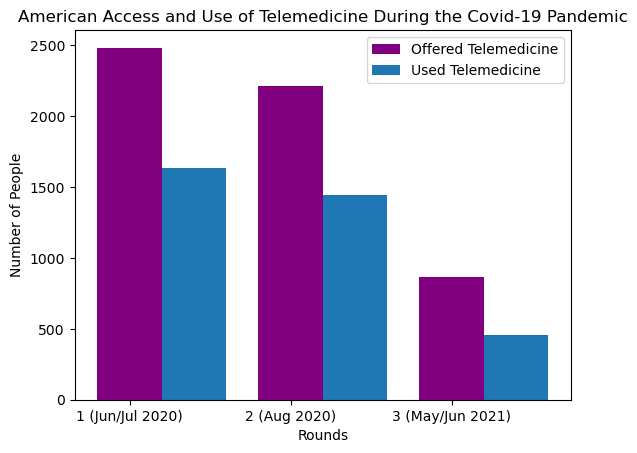

In [32]:
    rands = read_data_dict(RANDS_FILE, type_cast_dict = {})
    graph1(rands)

__Graph 1:__ For this graph, we used the RANDS dataset and pulled out the total number of people who were surveyed for each round, and the percentage of people in each round who responded “Yes” to “Offered a telemedicine appointment” and “Scheduled 1+ Telemedicine Appointment(s)”. We put these numbers into two separate lists and used the lists to convert the percentages to decimals, using the total number of people surveyed. We created new lists containing the final amount of people for each round who responded “Yes” to the two survey questions. We used these final lists to create the graph observing the national accessibility and usage of telemedicine overall during the pandemic. Based on this graph, we can see an overall decrease in the number of people who were offered and utilized telemedicine during the pandemic. This was surprising, as we had anticipated an increase in both accessibility and usage. 


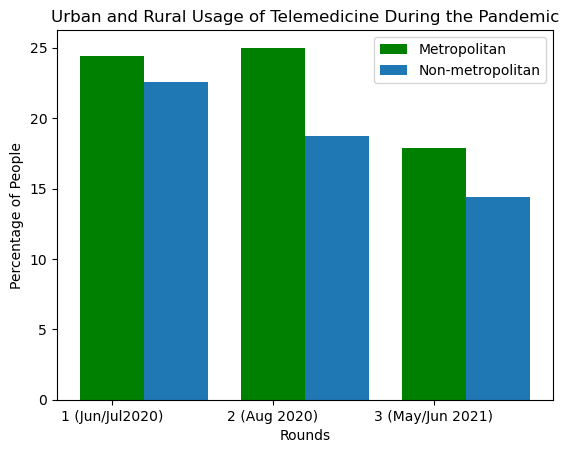

In [33]:
    rands = read_data_dict(RANDS_FILE, type_cast_dict = {})
    
    graph2(rands)

__Graph 2:__ For this graph, we used the RANDS dataset once again but instead of ignoring demographics, we focused on metropolitan vs non-metropolitan areas. We pulled out the percentage of people who responded ‘Yes’ to “Scheduled 1+ telemedicine appointments” in rounds 1, 2, and 3, and observed how those percentages differed per location in a bar graph. Analyzing our graph, we can see that the metropolitan usage of telemedicine stayed greater than the non-metropolitan usage of telemedicine. This was surprising as in our research we read that telemedicine was first created to improve the lives of those in rural areas, with less access to healthcare. There was a slight increase in the percentage of people in metropolitan areas who utilized telemedicine during round 2 of data collection, which could be due to the fact that metropolitan areas are more populated, and during a pandemic, people might have been less inclined to attend doctor visits in person. Overall, our graph shows that the usage of telemedicine declined in both metropolitan and non-metropolitan areas. We had anticipated the opposite and expected a larger percentage of people in non-metropolitan areas to utilize online health services. 


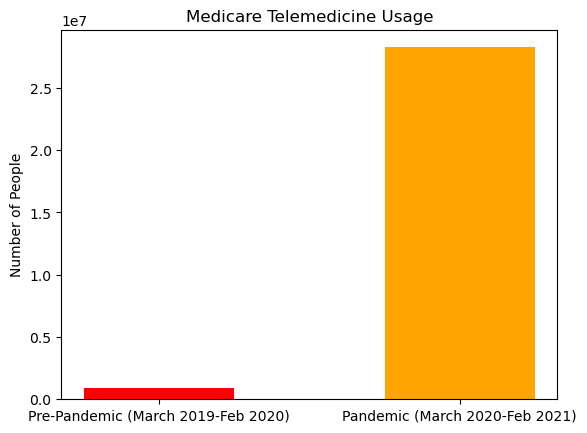

In [34]:
    # read our dataset into a list of dicts
    medicare = read_data_dict(MEDICARE_FILE)
    graph3(medicare)

__Graph 3:__ For this information, we used the Medicare/aid dataset. We pulled out the number of people nationwide who have either/both Medicare and Medicaid. Then, we compared those who utilized all different forms of telemedicine before and after COVID-19 in a bar graph. There was a drastic jump in usage post-COVID-19, from around 1 million to 24 million, which we were not surprised about. We had taken an educated guess that those who struggled with the accessibility of health care would greatly benefit from something like telemedicine and anticipated that the government would want to use telemedicine to its best advantage during a pandemic. 


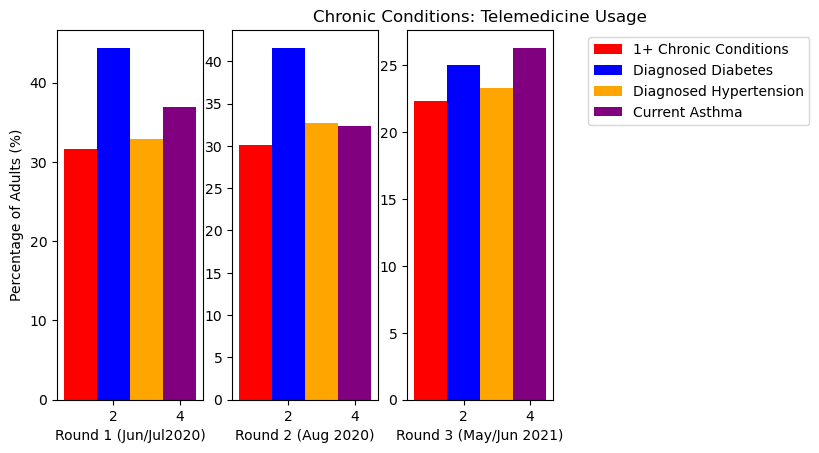

In [35]:
    graph4(rands)
    
main()

__Graph 4:__ This graph also used the RANDS dataset. We pulled out demographic information about chronic conditions: those with one or more chronic conditions, diagnosed diabetes, diagnosed hypertension, and current asthma. We wanted to see if those with more persistent health conditions, who are at increased risk of COVID-19, would be more inclined to attend medical visits virtually versus in person. According to our graph, this is false, although at first glance it looks true. We were unable to get our graph to be consistent with the Y-axis intervals. When you read the percentages, there is a decrease in all categories of chronic conditions as time progresses. 

__Conclusion:__ 
Although it seems to have been popularized by the pandemic because practically everyone has heard the word “telemedicine” by now, telemedicine has not increased in usage or accessibility. From this conclusion, we hypothesize that the media has popularized telemedicine more than it has been in effect. 

The possible benefit of our analysis not going as we intended could be that it brings up the question: “why don’t people use telemedicine as much as expected?” More research and resources could be inputted into answering this question so more people could weigh the benefits or risks of online healthcare, and work to make improvements to it. A potential benefit of using telemedicine is convenience: it decreases transportation time and costs and waiting time. Also, in situations like a pandemic and quarantine where it is not smart for one to leave their home, using technology to see your doctor is a great way to avoid risky behavior. The potential harm that comes with telemedicine would be in terms of security and safety because if you use telemedicine, there is a greater risk of online security issues that you don’t experience when you visit the doctor in person. A virtual platform is never guaranteed safe from hackers, so not wanting to give away private health information in an online setting is a completely valid concern. 

A downside to our analysis is that because our research is on such a new topic, there aren’t very many datasets available. We were only able to use two sets of data that luckily had all the information we needed for our questions. We were lucky that these datasets had such detailed information about demographics and included large groups of people, so it was clear that the researchers did a good job of data collection. Also, we observed that in the survey there were different totals of people who responded to various questions, indicating that people did have the chance to opt out of questions that might have felt too personal. This means that our data was collected ethically. That being said, for a more thorough investigation, we recognize more information is necessary. 

__References__

2020 and 2021 NAMCS Physician Induction Interview - Physician Telemedicine or Telehealth Technology Use. (2022). https://www.cdc.gov/nchs/covid19/namcs/physician-telemedicine.htm

Demeke, H. B., Merali, S., Marks, S., Pao, L. Z., Romero, L., Sandhu, P., Clark, H., Clara, A., McDow, K. B., Tindall, E., Campbell, S., Bolton, J., Le, X., Skapik, J. L., Nwaise, I., Rose, M. A., Strona, F. V., Nelson, C., & Siza, C. (2021). Trends in Use of Telehealth Among Health Centers During the COVID-19 Pandemic — United States, June 26–November 6, 2020. MMWR. Morbidity and Mortality Weekly Report, 70(7), 240–244. https://doi.org/10.15585/mmwr.mm7007a3

Medicare Telemedicine Snapshot. CMS. (n.d.). Retrieved October 5, 2022, from https://www.cms.gov/medicare-telemedicine-snapshot

Telemedicine - Research and Development Survey - COVID-19. (2022). https://www.cdc.gov/nchs/covid19/rands/telemedicine.htm



